***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Alura/dados_03.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dataset.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
SM = 788
SM_classes = np.multiply([0, 2, 5, 15, 25, np.inf], SM)
print(SM_classes)

[    0.  1576.  3940. 11820. 19700.    inf]


### 2º Definir os labels das classes

In [ ]:
SM_labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [ ]:
SM_frequencia = pd.value_counts(
    pd.cut(
        dataset['Renda'], bins=SM_classes, labels=SM_labels, include_lowest=True
           ),
    ascending=False
    )

### 4º Construir a coluna de percentuais

In [ ]:
SM_percentual = pd.value_counts(
    pd.cut(
        dataset['Renda'], bins=SM_classes, labels=SM_labels, include_lowest=True
    ),
    normalize=True,
    ascending=False
)*100
print(SM_percentual)

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
SM_df = pd.DataFrame(
    {'Frequencia': SM_frequencia, 'Percentual': SM_percentual},
    )

### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

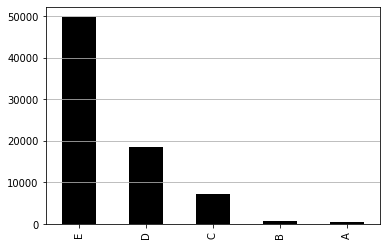

In [ ]:
plt.figure()
SM_df.Frequencia.plot.bar(color='black')
plt.grid(axis='y')

> ### Conclusões

Do gráfico é possível abstrair a velha intuição sobre os 1% mais ricos do país possuírem 99% da renda total da população, visto que, neste dataset, a população conjunta das classes E, D e C é suficiente para totalizar 98,5% da total e sabe-se que sua renda não é elevada.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de Frequências - Idade')

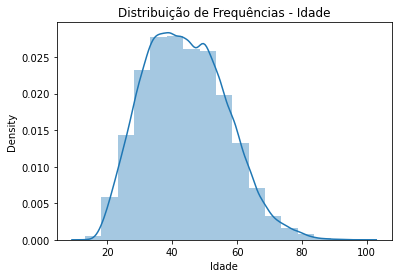

In [ ]:
k = 1 + (10/3)*np.log10(dataset.shape[0])
k = int(k.round(2))

sns.distplot(dataset.Idade, bins=k)
plt.title('Distribuição de Frequências - Idade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de Frequências - Altura')

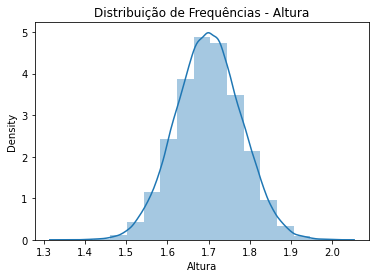

In [ ]:
sns.distplot(dataset.Altura, bins=k)
plt.title('Distribuição de Frequências - Altura')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de Frequências - Anos de Estudo')

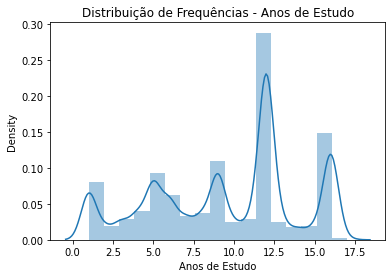

In [ ]:
sns.distplot(dataset['Anos de Estudo'], bins=k)
plt.title('Distribuição de Frequências - Anos de Estudo')

> ### Conclusões

Na ordem em que foram escolhidas, as variáveis são, respectivamente, assimétrica à direita, simétrica e assimétrica à esquerda. Para o primeiro gráfico, deve-se a uma das simplificações no dataset, dado que a maior parte dos 'chefes de família' provavelmente está em uma idade adulta (algo em torno de 20 a 60 anos); no segundo caso, naturalmente seria simétrica uma vez que, como dito em aula, os dados originam de uma curva normal; para a última figura, a educação apenas até o fim do ensino médio já leva mais de 10 anos, sendo assim, a tendência dessa curva é tornar-se cada vez mais assimétrica com a melhora da educação, ainda que isso não tenha sido totalmente alcançado.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

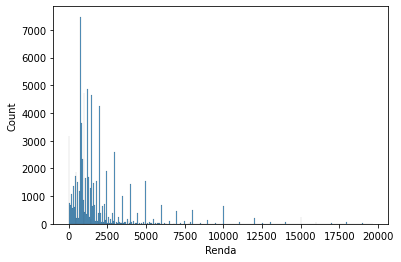

In [ ]:
qry = dataset.query('Renda < 20000')
sns.histplot(qry.Renda)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
sexo_cor = pd.crosstab(index=dataset.Sexo, columns=dataset.Cor)
sexo_cor.rename(index=sexo, columns=cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
sexo_cor = pd.crosstab(index=dataset.Sexo, columns=dataset.Cor, normalize=True)*100
sexo_cor.rename(index=sexo, columns=cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Essa parcela fica relativamente limitada por conta das considerações: aqui, os homens representam pouco mais que o dobro das mulheres, apesar disso, sabe-se que a maior parte da população é feminina. Por outro lado, a população parda realmente representa a maioria.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
media = dataset.Renda.mean()
print(media)

2000.3831988547631


### Obtenha a mediana

In [ ]:
mediana = dataset.Renda.median()
print(mediana)

1200.0


### Obtenha a moda

In [ ]:
moda = dataset.Renda.mode()
print(moda)

0    788
dtype: int64


### Obtenha o desvio médio absoluto

In [ ]:
dma = dataset.Renda.mad()
print(dma)

1526.4951371644931


### Obtenha a variância

In [ ]:
var = dataset.Renda.var()
print(var)

11044906.00622118


### Obtenha o desvio-padrão

In [ ]:
desv = dataset.Renda.std()
print(desv)

3323.3877303470294


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
sexo_cor_2 = pd.crosstab(dataset.Sexo, dataset.Cor, values=dataset.Renda, aggfunc={'mean', 'median', 'max'})
sexo_cor_2.rename(index=sexo, columns=cor, inplace=True)
print(sexo_cor_2)

                max                              ...  median                        
Cor        Indígena    Branca    Preta  Amarela  ...  Branca   Preta Amarela   Parda
Sexo                                             ...                                
Masculino   10000.0  200000.0  50000.0  50000.0  ...  1700.0  1200.0  2800.0  1200.0
Feminino   120000.0  100000.0  23000.0  20000.0  ...  1200.0   800.0  1500.0   800.0

[2 rows x 15 columns]


> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
sexo_cor_3 = pd.crosstab(dataset.Sexo, dataset.Cor, values=dataset.Renda, aggfunc={'mad', 'var', 'std'})
sexo_cor_3.rename(index=sexo, columns=cor, inplace=True)
print(sexo_cor_3)
pass

                   mad               ...           var              
Cor           Indígena       Branca  ...       Amarela         Parda
Sexo                                 ...                            
Masculino   798.910889  2261.012346  ...  3.295707e+07  5.345747e+06
Feminino   3007.892952  1670.967106  ...  1.392166e+07  2.547960e+06

[2 rows x 15 columns]


> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

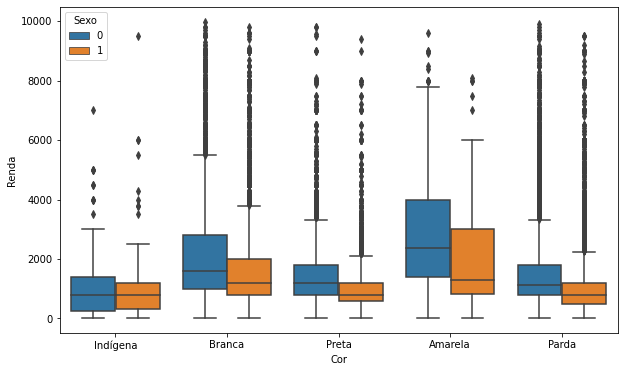

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=dataset.Cor, y=dataset.query('Renda < 10000').Renda, data=dataset, hue=dataset.Sexo)
plt.xticks(ticks=range(len(cor)-1), labels=list(cor.values()))
pass

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

d1 = stats.percentileofscore(dataset.Renda, 788.0, kind='weak')
print(d1)

28.86777719937533


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
d2 = dataset.Renda.quantile(q=0.99).max()
print(d2)

15000.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
d3 = pd.crosstab(
    index=dataset.Sexo,
    columns=dataset['Anos de Estudo'],
    values=dataset.Renda,
    aggfunc=('mean', 'median', 'max', 'std')
)
d3.rename(index=sexo, columns=anos_de_estudo, inplace=True)

print(d3)

                                          max  ...              std
Anos de Estudo Sem instrução e menos de 1 ano  ... Não determinados
Sexo                                           ...                 
Masculino                             30000.0  ...       979.648745
Feminino                              10000.0  ...       459.985964

[2 rows x 68 columns]


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Qtd. média de anos de estudo por homem: 9.1
Qtd. média de anos de estudo por mulher: 10.3


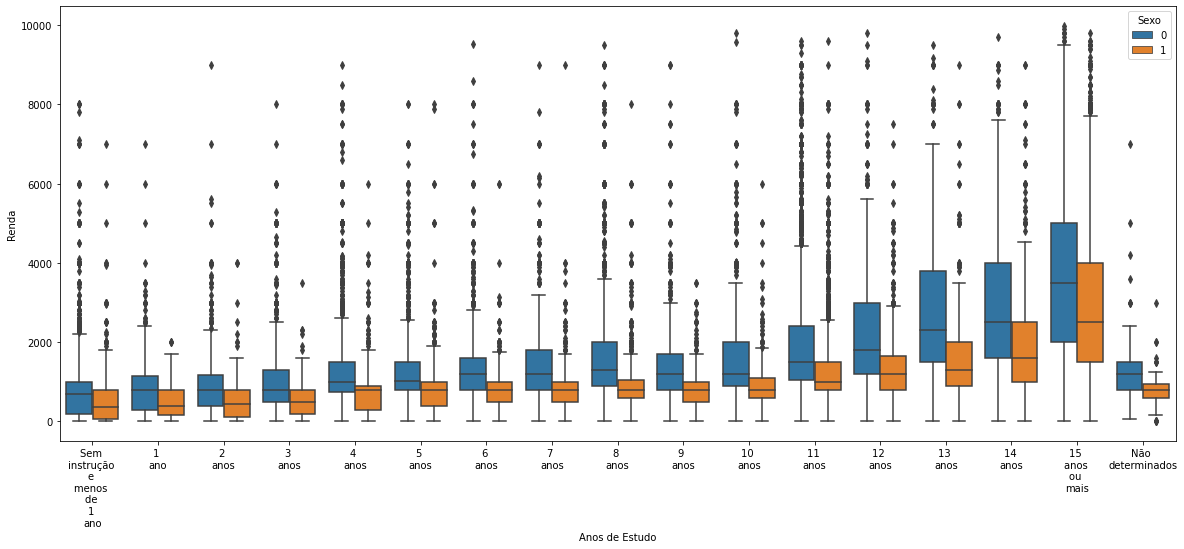

In [ ]:
d4_qry = dataset.query('Renda < 10000')


# Contornando a falta de linebreak automático do python
joinstr = '_joinjoin_'
labels_mod = joinstr.join(list(anos_de_estudo.values())).replace(' ', ' \n').split(joinstr)

plt.figure(figsize=(20, 8))
sns.boxplot(x=d4_qry['Anos de Estudo'], y=d4_qry.Renda, hue=d4_qry.Sexo)
plt.xticks(ticks=range(len(anos_de_estudo)), labels=labels_mod)

d4_group_anos = dataset.groupby(by='Sexo').mean()['Anos de Estudo']
print('Qtd. média de anos de estudo por homem: %.1f' % d4_group_anos[0].round(1))
print('Qtd. média de anos de estudo por mulher: %.1f' % d4_group_anos[1].round(1))

> ### Conclusões

Para qualquer quantidade de anos de estudo e medidor tomados, os homens ganham mais que as mulheres. Ainda que o gráfico não mostre, calculou-se que, em média, as mulheres estudam mais que os homens. A junção dessas duas informações apenas realça outro formato de desigualdade no Brasil.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
d5_group = dataset.groupby('UF').agg({'Renda': ['mean', 'median', 'max', 'std']})
d5_group.rename(index=uf, inplace=True)

print(d5_group)

                           Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              114

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

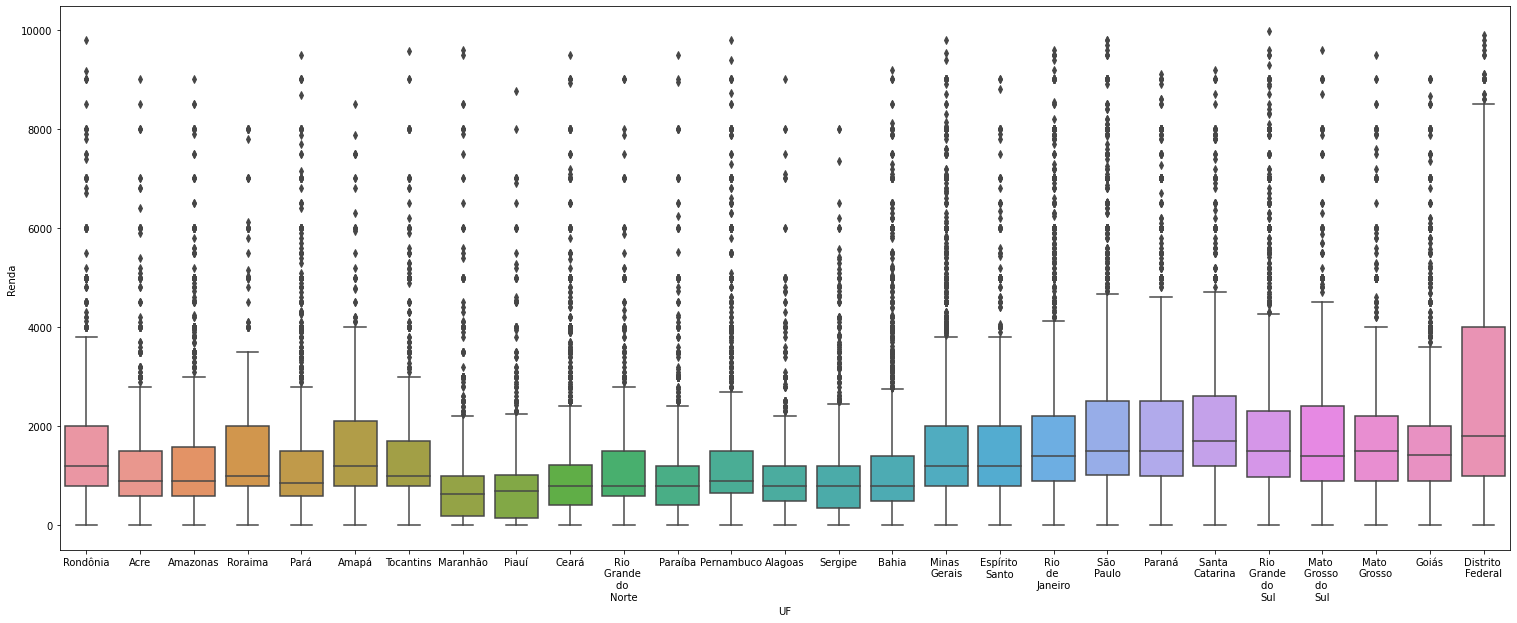

In [ ]:
d6_group = dataset.query('Renda < 10000').groupby(by='UF')
ufs = dataset.UF.unique()

# Contornando a falta de linebreak automático do python
joinstr = '_joinjoin_'
labels_mod = joinstr.join(list(uf.values())).replace(' ', ' \n').split(joinstr)


plt.figure(figsize=(26,10))
for _, block in d6_group:
  sns.boxplot(x='UF', y='Renda', data=block, order=ufs)
plt.xticks(ticks=list(range(len(uf))), labels=labels_mod)
pass

> ### Conclusões

Resgatando a tabela que relaciona os códigos de UF aos respecitos estados, tem-se o esperado: a figura mostra os estados do sul e sudeste (de 31 para frente) com uma renda razoavelmente maior, o que também reflete medições de desenvolvimento como o IDH. A diferença poderia ter sido maior, visto que os outliers foram retirados e sabe-se que existem grandes riquezas concentradas no sul-sudeste.